In [18]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

sns.set()
pd.options.display.float_format = '{:,.3f}'.format

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# Univariate Plots

In [105]:
# load the dataset
#df = pd.read_csv("export-verified-contracts.csv",sep=",")
df = pd.read_csv("export-NetworkUtilization.csv",sep=",")

In [106]:
#reformat column names to non-uniques
df["Date(UTC)"] = pd.to_datetime(df["Date(UTC)"])
df.columns = ["Date","TimeStamp","Value"]
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.week

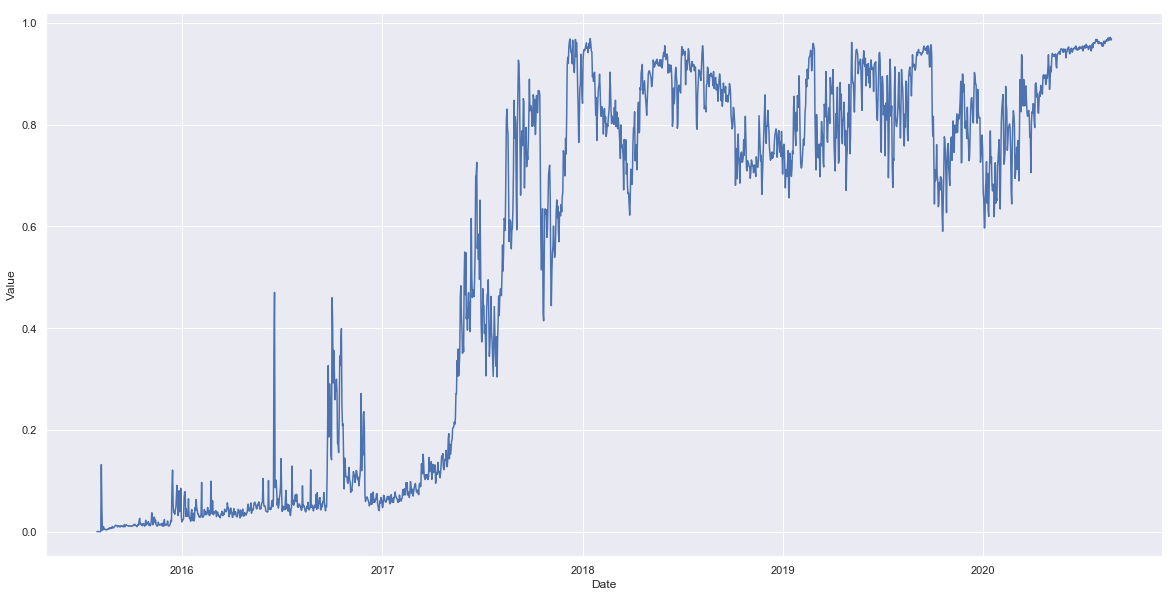

In [107]:
# time series plot
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=df)

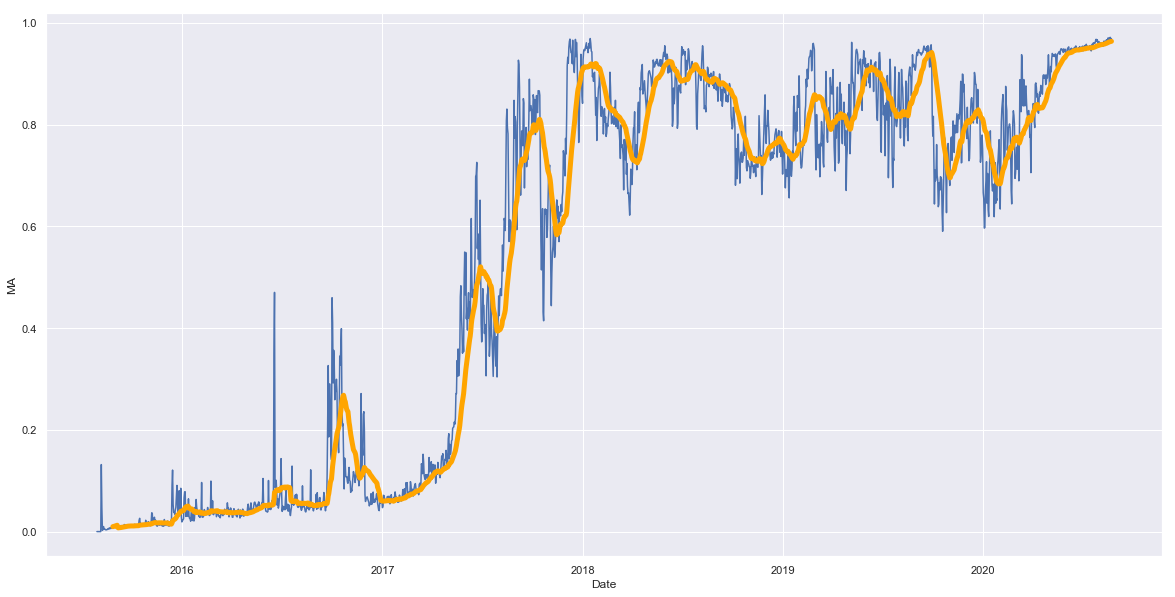

In [108]:
# time series with moving average (30 days)
plot_df = df.copy()
plot_df["MA"] = plot_df["Value"].rolling(30).mean() 
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="Date", y="Value", data=plot_df)
ax = sns.lineplot(x="Date", y="MA", data=plot_df, linewidth=5, color="orange")

In [109]:
# table aggregated by average at year level
table = df[["Year","Value"]].groupby("Year").mean()

# you need to turn "Value" into it true meaningful name
table

,Value
Year,
2015,0.018
2016,0.076
2017,0.436
2018,0.834
2019,0.826
2020,0.864


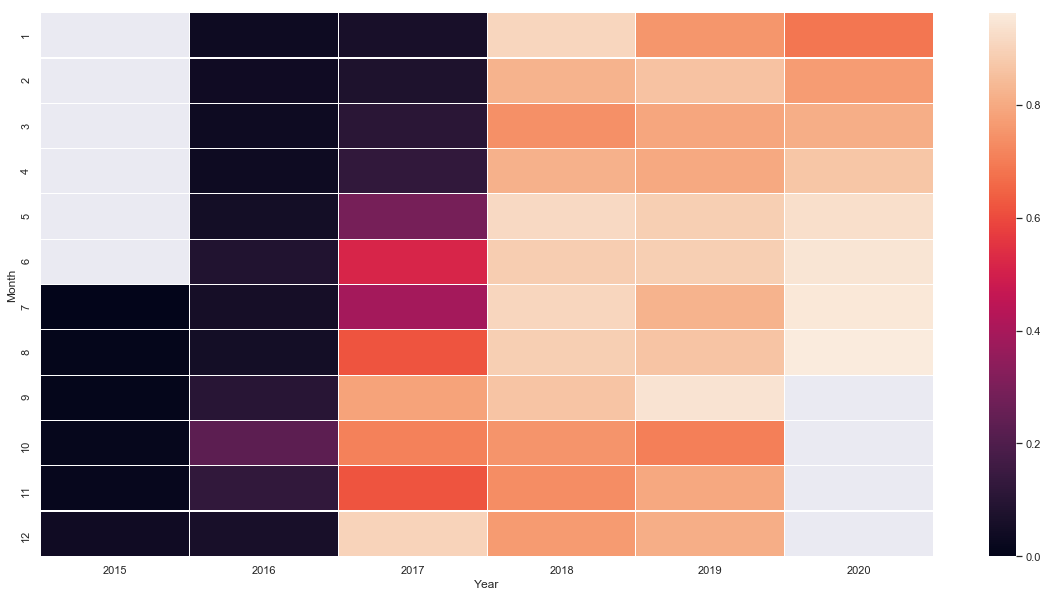

In [110]:
# heatmap by year and month
fig, ax = plt.subplots(figsize=(20,10))
plot_df = df[["Year","Month","Value"]].copy()
plot_df = plot_df.pivot_table(index="Month", columns="Year", values="Value",aggfunc="mean")
ax = sns.heatmap(plot_df, linewidths=0.1)

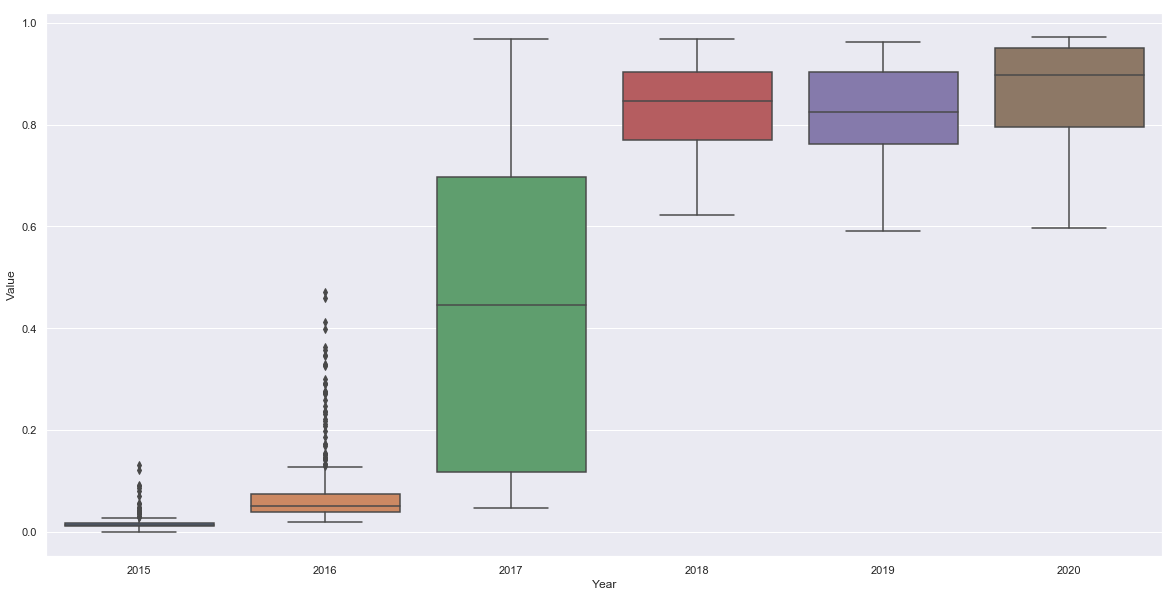

In [111]:
# Boxplots groupped by year
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x=df["Year"],y=df["Value"])

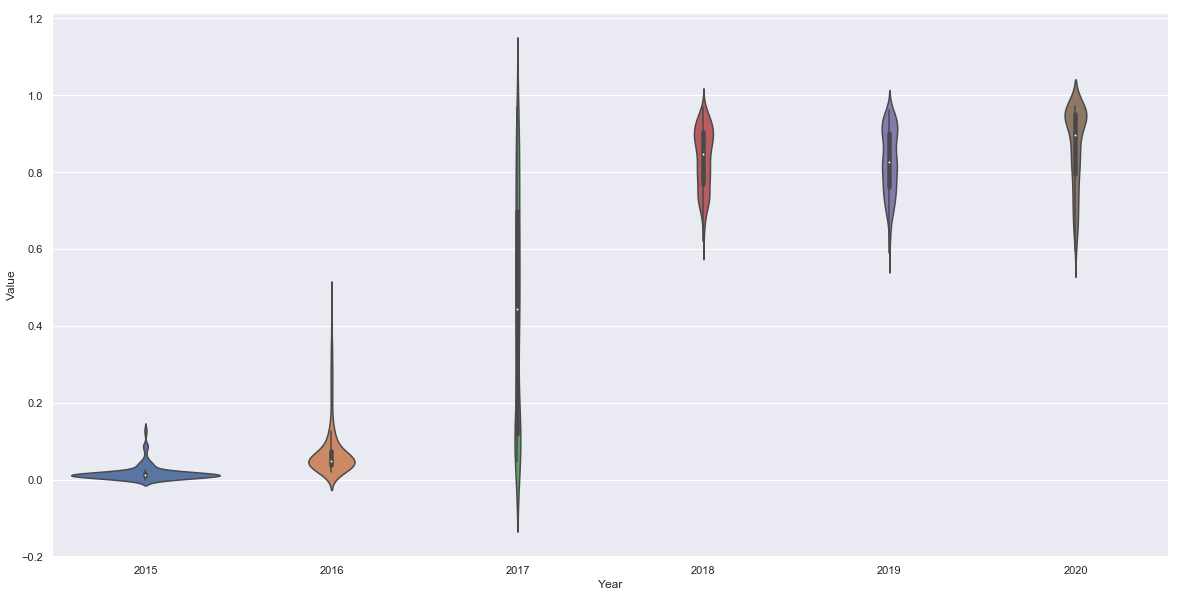

In [112]:
# violinplot groupped by year
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.violinplot(x=df["Year"],y=df["Value"])

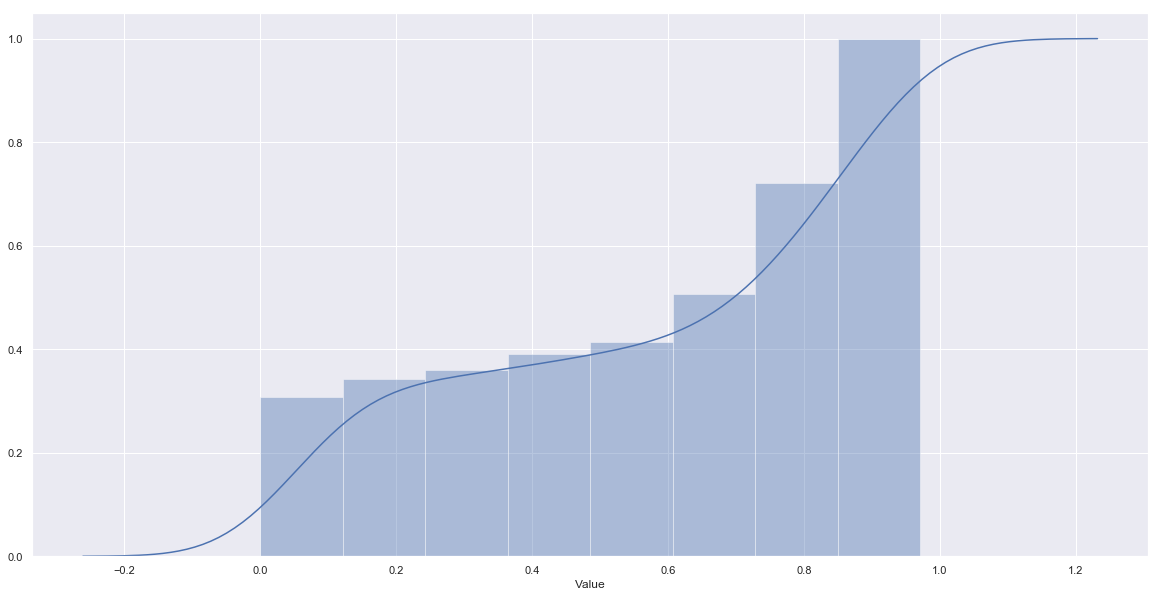

In [113]:
# ECDF
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.distplot(df["Value"], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

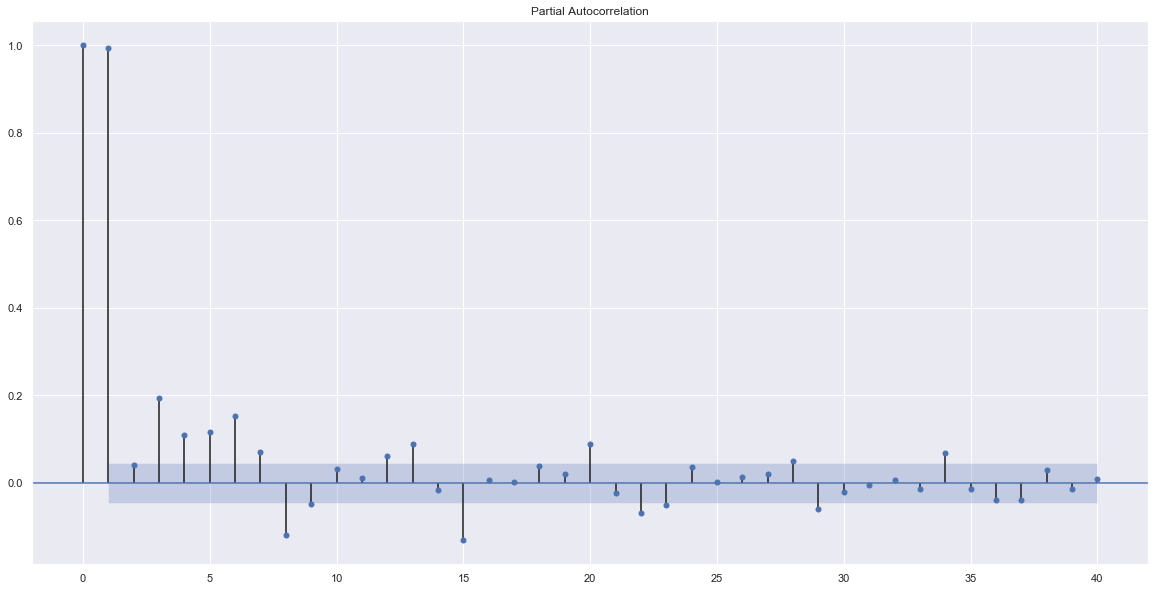

In [114]:
# partial auto correlation at daily
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(20,10))
plot_pacf(df["Value"].values, lags=40,ax=ax)
plt.show()

# Multivariate Plots